In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
model = tf.keras.models.load_model('plant_trained_model.keras')

2025-03-23 13:48:42.397935: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-03-23 13:48:42.398095: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-03-23 13:48:42.398101: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
I0000 00:00:1742717022.398477 18146069 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1742717022.398643 18146069 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 39)             │        58,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,532,791 (89.77 MB)

 Trainable params: 7,844,263 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,688,528 (59.85 MB)

In [4]:
import cv2

In [7]:
treatment_df = pd.read_csv('treatments.csv')  # Ensure this file is in your project directory
treatment_dict = pd.Series(treatment_df['Treatment'].values, index=treatment_df['Disease_Name']).to_dict()

In [8]:
import pandas as pd
import csv
# Load the CSV file
plant_info_df = pd.read_csv("treatment/plant_requirements.csv")

# Display the first few rows to check if it's loaded properly
print(plant_info_df.head())

                    Disease Plant Name Optimal_temperature  \
0        Apple___Apple_scab      Apple           0 to 35 ℃   
1         Apple___Black_rot      Apple           0 to 35 ℃   
2  Apple___Cedar_apple_rust      Apple           0 to 35 ℃   
3           Apple___healthy      Apple           0 to 35 ℃   
4       Blueberry___healthy  Blueberry            20-26 °C   

  Sunlight_requirement Watering _requirement  
0                 Full                Medium  
1                 Full                Medium  
2                 Full                Medium  
3                 Full                Medium  
4                 Full                Medium  


In [9]:
import csv

def load_treatments():
    treatments = {}
    with open('treatments.csv', 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            treatments[row[0]] = row[1]
    return treatments

# Load treatments into memory
treatments = load_treatments()

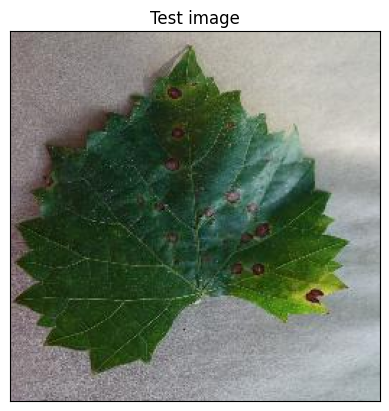

In [10]:
image_path = "train/Grape___Black_rot/0a06c482-c94a-44d8-a895-be6fe17b8c06___FAM_B.Rot 5019_flipLR.JPG"
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))
input_array=tf.keras.preprocessing.image.img_to_array(image)
input_array=np.array([input_array]) #converting single image to batch
print(input_array.shape)

(1, 128, 128, 3)


In [12]:
predictions=model.predict(input_array)
predictions, predictions.shape

2025-03-23 13:49:44.409292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


(array([[3.7492487e-17, 1.4212539e-16, 1.5620910e-13, 3.7613640e-19,
         1.6331562e-20, 9.2674826e-18, 2.0644487e-19, 1.3013956e-12,
         1.3488094e-21, 6.4962387e-16, 4.6043232e-25, 9.3457741e-01,
         6.5391108e-02, 3.4756766e-07, 4.6194017e-17, 1.0693850e-19,
         2.0310334e-10, 5.2034002e-21, 5.3327967e-12, 1.8426371e-17,
         9.5292079e-13, 1.6407904e-16, 1.1264798e-18, 2.8184579e-16,
         3.5328525e-20, 4.4267577e-15, 1.3772503e-09, 2.8013237e-20,
         1.9823017e-06, 2.9137267e-05, 4.7965820e-12, 9.3658356e-15,
         1.0235772e-13, 3.9310059e-18, 9.5089501e-12, 1.0533683e-11,
         3.6256144e-14, 2.8678410e-21, 1.8033384e-12]], dtype=float32),
 (1, 39))

In [13]:
plant_details = plant_info_df[plant_info_df['Plant Name'] == plant_name].iloc[0]
optimal_temperature = plant_details['Optimal Temperature (°C)']
sunlight_requirement = plant_details['Sunlight Requirement']
temperature, weather_description = get_weather(city) Watering _requirement = plant_details['Watering Requirement']



SyntaxError: invalid syntax (1868207683.py, line 4)

In [21]:
import requests

def get_weather(city):
    api_key = "3221f53aa4b128383e9eb2b265999ed4"  
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}" 
    response = requests.get(url)
    data = response.json()

    if data['cod'] == 200:
        main = data['main']  
        weather = data['weather'][0] 
        temperature = main['temp'] - 273.15  # Convert from Kelvin to Celsius
        weather_description = weather['description'] 
        return temperature, weather_description
    else:
        print("City not found or error occurred.")

        return None, None

city = "kathmandu"
temperature, description = get_weather(city)
if temperature is not None and description is not None:
    print(f"The temperature in {city} is {temperature:.2f}°C with {description}.")


The temperature in kathmandu is 26.12°C with scattered clouds.


In [30]:
class_names=[
    'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy',
    'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight',
    'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy',
    'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight',
    'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch',
    'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy', 'not_a_leaf'
]

print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [31]:
result_index = np.argmax(predictions)  # Get the predicted class index
print(f"Predicted class index: {result_index}")
print(f"Predicted class: {class_names[result_index]}")  # Display the predicted class name
treatment_text = treatment_dict.get(class_names[result_index], "No treatment available.")
print(f"Recommended Treatment:\n{treatment_text}")



Predicted class index: 11
Predicted class: Grape___Black_rot
Recommended Treatment:
Apply copper-based fungicides during the growing season to control black rot. Prune and remove any infected leaves and vines. Ensure proper airflow by spacing vines properly and consider using resistant grape varieties.


In [32]:
# Step 1: Get the predicted class name
predicted_class = class_names[result_index]
print(f"Predicted class: {predicted_class}")  # Display the predicted class name

# Step 2: Split the predicted class into plant name and disease name
plant_name = predicted_class.split("___")[0]  # e.g., 'Apple'
disease_name = predicted_class.split("___")[1]  # e.g., 'Apple_scab'

print(f"Predicted Plant: {plant_name}")
print(f"Predicted Disease: {disease_name}")

# Step 3: Fetch treatment from the treatment dictionary
treatment_text = treatment_dict.get(predicted_class, "No treatment available.")
print(f"Recommended Treatment:\n{treatment_text}")

# Step 4: Fetch plant requirements (Optimal Temperature, Sunlight, Watering) from the CSV
plant_info = plant_info_df[plant_info_df['Plant Name'] == plant_name].iloc[0]
optimal_temperature = plant_info['Optimal_temperature']  # Match the column name from CSV
sunlight_requirement = plant_info['Sunlight_requirement']  # Match the column name from CSV
watering_requirement = plant_info['Watering _requirement']  # Match the column name from CSV

# Print the plant requirements
print(f"Optimal Temperature: {optimal_temperature}")
print(f"Sunlight Requirement: {sunlight_requirement}")
print(f"Watering Requirement: {watering_requirement}")

# Step 5: Show weather information (from previous weather API code)
if temperature is not None:
    print(f"Current Temperature in {city}: {temperature:.2f}°C ({description})")
else:
    print("Weather data not available.")


Predicted class: Grape___Black_rot
Predicted Plant: Grape
Predicted Disease: Black_rot
Recommended Treatment:
Apply copper-based fungicides during the growing season to control black rot. Prune and remove any infected leaves and vines. Ensure proper airflow by spacing vines properly and consider using resistant grape varieties.
Optimal Temperature: 25 to 32°C
Sunlight Requirement: Full
Watering Requirement: Medium
Current Temperature in kathmandu: 26.12°C (scattered clouds)


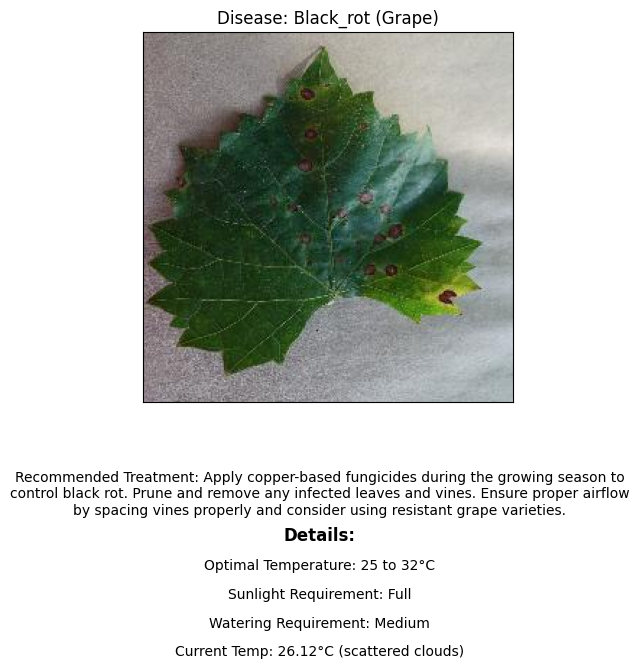

In [29]:
import matplotlib.pyplot as plt

# Step 1: Get the predicted class name
model_prediction = class_names[result_index]

# Step 2: Fetch treatment, plant requirements, and weather info (as you already did)
plant_name = model_prediction.split("___")[0]
disease_name = model_prediction.split("___")[1]

# Fetch treatment from the treatment dictionary
treatment_text = treatment_dict.get(model_prediction, "No treatment available.")

# Fetch plant requirements from the plant info DataFrame
plant_info = plant_info_df[plant_info_df['Plant Name'] == plant_name].iloc[0]
optimal_temperature = plant_info['Optimal_temperature']
sunlight_requirement = plant_info['Sunlight_requirement']
watering_requirement = plant_info['Watering _requirement']

# Fetch weather info
if temperature is not None:
    weather_info = f"Current Temp: {temperature:.2f}°C ({description})"
else:
    weather_info = "Weather data not available."

# Step 3: Visualize the image with the information
plt.imshow(img)
plt.title(f"Disease: {disease_name} ({plant_name})")  # Title with plant and disease name

# Add treatment text
plt.figtext(0.5, -0.12, f"Recommended Treatment: {treatment_text}", wrap=True, ha='center', fontsize=10)

# Add "Details" section
plt.figtext(0.5, -0.18, f"Details:", wrap=True, ha='center', fontsize=12, weight='bold')

# Add plant requirements under "Details"
plt.figtext(0.5, -0.24, f"Optimal Temperature: {optimal_temperature}", wrap=True, ha='center', fontsize=10)
plt.figtext(0.5, -0.30, f"Sunlight Requirement: {sunlight_requirement}", wrap=True, ha='center', fontsize=10)
plt.figtext(0.5, -0.36, f"Watering Requirement: {watering_requirement}", wrap=True, ha='center', fontsize=10)

# Add weather information
plt.figtext(0.5, -0.42, weather_info, wrap=True, ha='center', fontsize=10)

# Hide axis ticks
plt.xticks([])
plt.yticks([])

# Show the plot
plt.show()


## More test images

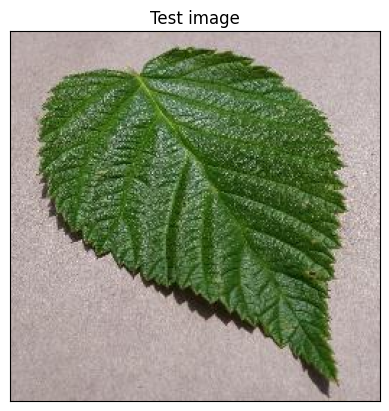

In [33]:
image_path = "train/Raspberry___healthy/05dfc382-396a-4301-b940-7d1098feba11___Mary_HL 6358_180deg.JPG"
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Test image")
plt.xticks([])
plt.yticks([])
plt.show()

In [34]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))
input_array=tf.keras.preprocessing.image.img_to_array(image)
input_array=np.array([input_array]) #converting single image to batch
print(input_array.shape)

(1, 128, 128, 3)


In [35]:
predictions=model.predict(input_array)
predictions, predictions.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


(array([[3.78304332e-20, 4.27602614e-17, 4.02090002e-22, 7.75414078e-18,
         1.03893529e-14, 1.39988526e-16, 6.54864075e-13, 2.53360839e-23,
         1.23719308e-28, 3.07380194e-25, 3.10573999e-27, 1.25618460e-17,
         5.29519438e-17, 2.42400674e-21, 1.23496031e-17, 6.43186047e-20,
         3.67377142e-16, 1.08515976e-19, 9.40463392e-15, 3.60185937e-10,
         5.12235439e-20, 4.41148015e-15, 6.15368208e-07, 9.99999404e-01,
         2.45270609e-10, 1.79889263e-18, 3.91988349e-14, 1.58065383e-09,
         6.33182977e-20, 5.43584453e-16, 1.32169830e-17, 9.73367996e-15,
         2.32333693e-17, 1.56733979e-12, 1.12920112e-12, 1.72647188e-13,
         3.58999281e-18, 1.05053485e-17, 1.69112682e-20]], dtype=float32),
 (1, 39))

In [36]:
result_index = np.argmax(predictions)  # Get the predicted class index
print(f"Predicted class index: {result_index}")
print(f"Predicted class: {class_names[result_index]}")  # Display the predicted class name


Predicted class index: 23
Predicted class: Raspberry___healthy


In [37]:
treatment_text = treatment_dict.get(class_names[result_index], "No treatment available.")
print(f"Recommended Treatment:\n{treatment_text}")

Recommended Treatment:
Raspberries require slightly acidic, well-drained soil and regular watering. Prune dead or damaged canes to encourage healthy new growth. Mulch around the base to retain moisture and prevent weed growth.


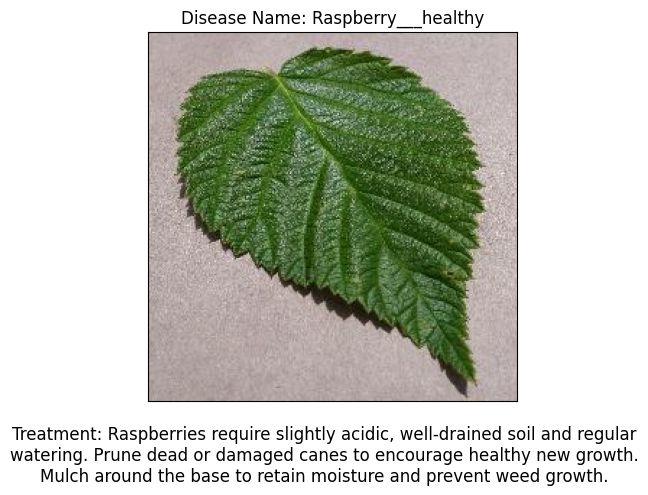

In [38]:
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {class_names[result_index]}")  
plt.figtext(0.5, -0.05, f"Treatment: {treatment_text}", wrap=True, ha='center', fontsize=12)
plt.xticks([])
plt.yticks([])
plt.show()